In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('D:/Datamining/ObesityDataSet_raw_and_data_sinthetic.csv', na_values = '?')
df = dataset
df = df.replace('?', np.NaN)
df = df.dropna()

In [3]:
#資料轉換(one-hot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']]: 
    df[col] = le.fit_transform(df[col])

In [4]:
from sklearn import cluster
from datetime import datetime

start = datetime.now()

#KMeans演算法
kmeans_fit = cluster.KMeans(n_clusters = 7, random_state = 42).fit(df) 

end = datetime.now()
time = end - start

print("分群時間：", time)

y = df['NObeyesdad'] 

cluster_labels = kmeans_fit.labels_

分群時間： 0:00:00.187495


In [5]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

print(purity_score(y,cluster_labels))

0.5277119848413074


In [6]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

#輸出Silhouette Coefficient指標
print("Silhouette Coefficient:",metrics.silhouette_score(df, cluster_labels, metric='euclidean'))

Silhouette Coefficient: 0.4302915210921277


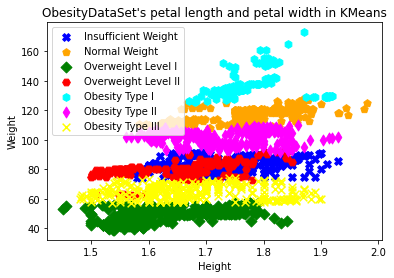

In [9]:
import matplotlib.pyplot as plt

C0 = df[cluster_labels == 0]
C1 = df[cluster_labels == 1]
C2 = df[cluster_labels == 2]
C3 = df[cluster_labels == 3]
C4 = df[cluster_labels == 4]
C5 = df[cluster_labels == 5]
C6 = df[cluster_labels == 6]

plt.scatter(C0['Height'],C0['Weight'],marker='X',c="blue",s=60,label = 'Insufficient Weight' )
plt.scatter(C1['Height'],C1['Weight'],marker='p',c="orange",s=60, label = 'Normal Weight')
plt.scatter(C2['Height'],C2['Weight'],marker='D',c="green",s=60,label = 'Overweight Level I')
plt.scatter(C3['Height'],C3['Weight'],marker='H',c="red",s=60,label = 'Overweight Level II')
plt.scatter(C4['Height'],C4['Weight'],marker='h',c="cyan",s=60,label = 'Obesity Type I')
plt.scatter(C5['Height'],C5['Weight'],marker='d',c="magenta",s=60,label = 'Obesity Type II')
plt.scatter(C6['Height'],C6['Weight'],marker='x',c="yellow",s=60,label = 'Obesity Type III')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('ObesityDataSet\'s Height and Weight KMeans')
plt.legend()
plt.show()